## Universidad Politécnica Salesiana
#### Nombre: Angel Jadan
#### Fecha: 2/5/2021

#### Simulación de movimiento de vehiculos en la Ciudad de Cuenca, entre la Av. Loja y 10 de agosto.

![alt text](mapa.png)


Configuración de vehiculos para simulación.
![alt text](conf_vehiculos.png)
Mapa de simulación de avenidas en SimTrafic.
![alt text](simulacion.png)

Resultado de la simulación.

Fuente de datos: http://201.159.222.99/bitstream/datos/7226/1/13172.pdf

In [115]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
url = "datos.csv"
df = pd.read_csv(url,sep="\;")
df

<ipython-input-116-12075f068fde>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(url,sep="\;")


,Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.813322,65.241349,76.509512,77.555556,73.517030,71.294029,73.332115,NaN,NaN,NaN
1,Afganist n,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,4.132233,4.453443,4.878051,9.171601,8.888893,11.258279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.669948,55.940131,50.747084,44.695031,29.754599,28.124485,29.004100,40.836290,40.556871,NaN
3,Albania,ALB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,29.241501,28.937487,28.916354,28.212979,27.267393,28.977864,31.569821,31.591574,31.555552,NaN
4,Andorra,AND,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.630699,23.256504,21.929561,22.502021,21.937317,23.698127,26.649932,26.431364,29.215526,NaN
260,"Yemen, Rep. del",YEM,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Sud frica,ZAF,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,29.550915,29.323968,29.406919,28.613876,27.435897,25.704051,...,30.460941,29.723879,30.971341,31.468645,30.152888,30.580928,29.627669,29.907083,29.853839,NaN
262,Zambia,ZMB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.471223,40.082911,40.482717,38.822290,37.138526,35.324676,34.992858,37.957353,34.636161,NaN


In [117]:
df = df[df['Name'].isin(['Ecuador'])]

df = df.loc[:,['Name','1960','1961','1962','1963','1964','1965','1966','1967','1968',\
           '1968','1969','1970','1971','1972','1973','1974','1975','1976',\
           '1977','1978','1979','1980','1981','1982','1983','1984','1985',\
           '1986','1987','1988','1989','1990','1991','1992','1993','1994',\
           '1995','1996','1997','1998','1999','2000','2001','2002','2003',\
           '2004','2005','2006','2007','2008','2009','2010','2011','2012',\
           '2013','2014','2015','2016','2017','2018','2019']]
df = df.set_index('Name').T

ecua = df["Ecuador"].astype(int)
df['Ecuador'] = ecua
anios = df['Ecuador'].index.tolist()
df['Anios'] = anios
an = df["Anios"].astype(int)
df["Anios"] = an

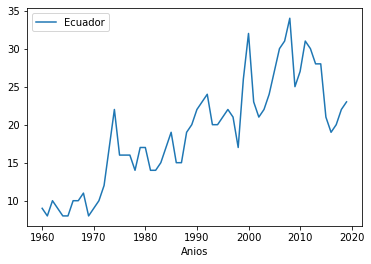

In [118]:
df.plot(y="Ecuador", x="Anios")

Y = mX + b

In [119]:
x = list(df.iloc [:, 0])
y = list(df.iloc [:, 1])

regr = linear_model.LinearRegression()

regr.fit(np.array(x).reshape(-1, 1), y)

print('Coeficintes: \n',regr.coef_)

print("Independiente termino: \n",regr.intercept_)

Coeficintes: 
 [2.13272535]
Independiente termino: 
 1948.9404237135661


In [120]:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

2162


[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89]


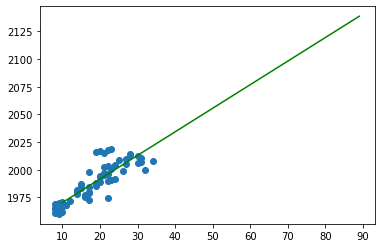

In [121]:
plt.scatter(x,y)
x_real = np.array(range(10,90))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1,1)), color='green')
plt.show()

In [122]:
y

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

Definamos la función en Python y realicemos elprocedimiento de ajuste de curva utilizado para el crecimiento logístico.

In [123]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y)
print(exp_fit)

(array([1882.39851097,   37.3091618 ]), array([[ 66.61474569, -22.82928999],
       [-22.82928999,   7.97891718]]))


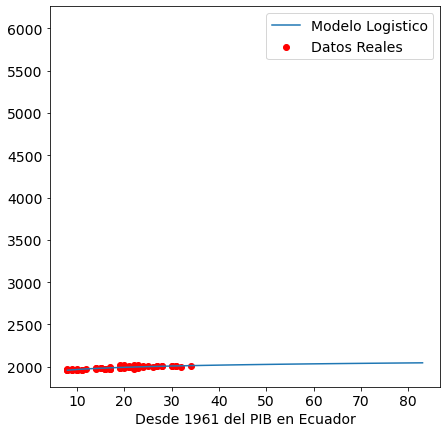

In [124]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde 1961 del PIB en Ecuador")
plt.ylabel("")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

[1.07303055e-03 7.57519397e+00]


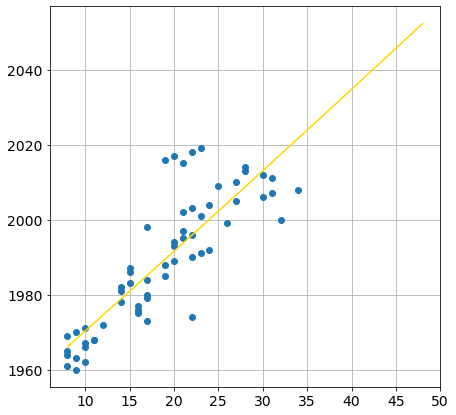

In [125]:
curve_fit = np.polyfit(x, np.log(y), deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(x), max(x)+15)))
yx = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx, color="gold")
plt.grid(True)